## 픽셀
이미지 데이터는 픽셀이라고 하는 작은 이미지를 직사각형 형태로 모은것이다.  
각 픽셀은 단색의 직사각형이다.  
전체 이미지의 크기를 표현할 때는 (세로픽셀 수 x 가로픽셀 수) 형식으로 표현한다.

## 색공간
픽셀의 색을 숫자로 표현하는 방식을 색공간(color space)라고 한다.  
대표적인 색공간으로는 그레이스케일(gray scale), RGB(Red-Green-Blue), HSV(Hue-Saturation-Value) 방식이 있다.

## 그레이 스케일
그레이스케일에서는 모든 색이 흑백이다. 각 픽셀은 명도를 나타내는 숫자로 표현된다.  
0은 검은색을 나타내고 숫자가 커질수록 명도가 증가하여 하얀색이 된다.  
숫자는 보통 0~255의 8비트 부호없는 정수로 저장된다.  
  
SciPy 패키지의 misc 서브 패키지의 face api는 이미지 처리용 샘플 이미지를 제공한다.  
인수로 gray=True 를 넘기면 그레이스케일 이미지를 반환한다.  
이미지의 크기는 배열의 shape 속성으로 볼 수 있다.

In [17]:
import scipy as sp

img_gray = sp.misc.face(gray=True)
img_gray.shape

/var/folders/mw/k_rydbt555l0d4t5g9pbrzrw0000gn/T/ipykernel_9059/535577516.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img_gray = sp.misc.face(gray=True)


(768, 1024)

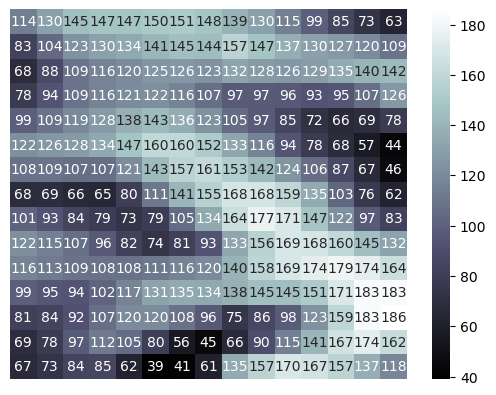

In [18]:
import matplotlib.pylab as plt
import seaborn as sns

sns.heatmap(data=img_gray[:15, :15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

## RGB
RGB 색공간에서 색은 Red, Green, Blue 의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현된다.  
8비트 부호없는 정수를 사용하는 경우 (255, 0, 0)은 빨간색, (0, 255, 0)은 녹색, (0, 0, 255)는 파란색이다.  
  
픽셀 데이터가 스칼라가 아닌 벡터이므로 이미지 데이터는 (세로픽셀수 x 가로픽셀수) 형태의 2차원 배열로 표현하지 못하고 (세로픽셀수 x 가로픽셀수 x 색채널) 형태의 3차원 배열로 저장한다.  
세번째 축을 색채널(channel)이라고 부른다.

In [19]:
from sklearn.datasets import load_sample_images

dataset = load_sample_images()
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

다음 그림에서 붉은 기와는 R채널의 값이 크고 하늘은 푸른색이므로 B채널의 값이 큰 것을 확인할 수 있다.

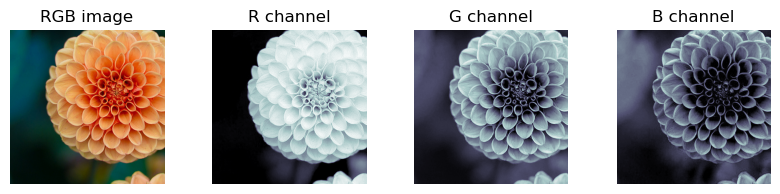

In [23]:
plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[100:400, 100:400, :])
plt.axis("off")
plt.title("RGB image")

plt.subplot(142)
plt.imshow(img_rgb[100:400, 100:400, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R channel")

plt.subplot(143)
plt.imshow(img_rgb[100:400, 100:400, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G channel")

plt.subplot(144)
plt.imshow(img_rgb[100:400, 100:400, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B channel")

plt.show()

## HSV
HSV(Hue, Saturation, Value) 색공간에서는 색이 다음 세가지 값으로 표현된다.  
- 색상(Hue): 색상값 H는 가시광성 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다. 0°~360°의 범위를 갖고 360°와 0°는 빨강을 가리킨다.
- 채도(Saturation): 채도값 S는 특정한 색상의 진함의 정도를 나타낸다. 가장 진항 상태를 100%이고 0%는 같은 명도의 무채색이다.
- 명도(Value): 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고, 검은색은 0%이다.

In [24]:
# 채도가 100일 때의 색공간

from matplotlib.colors import hsv_to_rgb
import numpy as np
V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S * 1.0, V))
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [25]:
# 색상(Hue)
HSV_S20[:4, :5, 0]

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [26]:
# 채도(Saturation)
HSV_S20[:4, :5, 1]

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [27]:
# 명도(Value)
HSV_S20[:4, :5, 2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

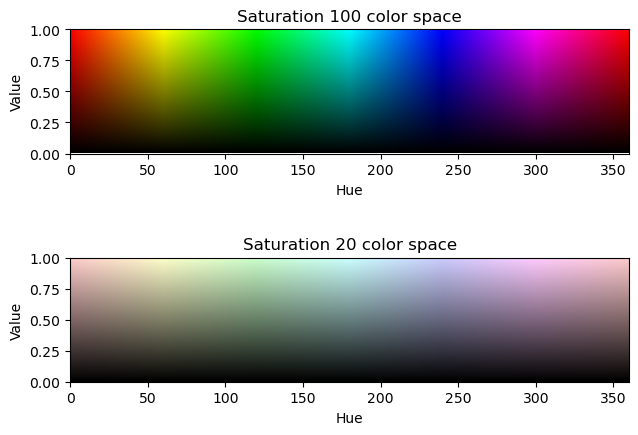

In [28]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("Hue")
plt.ylabel("Value")
plt.title("Saturation 100 color space")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("Hue")
plt.ylabel("Value")
plt.title("Saturation 20 color space")

plt.tight_layout()
plt.show()

matplotlib 패키지의 rgb_to_hsv, hsv_to_rgb 명령을 사용하면 RGB 색공간 표현과 HSV 색공간 표현을 상호변환할 수 있다.  
  
HSV 색공간에 투명도(transparency)를 표현하는 A(Alpha) 채널이 추가된 RGBA, HSVA 등의 색공간도 있다.

## 이미지 파일 형식
.bmp 확장자를 가지는 비트맵(bitmap) 파일은 지금까지 설명한 다차원 배열정보를 그대로 담고있다. 하지만 비트맵 파일은 파일 용량이 크기 때문에 압축을 통해 용량을 줄인 JPG, GIF, PNG 등의 압축파일 형식도 많이 사용한다.
- JPEG: 
    - JPEG는 Joint Picture Experts Group의 약자로 이미지 압축 기술자 모임인 JPEG 위원회에서 개발한 이미지 파일 형식이다. JPEG 파일은 웹상 및 멀티미디어 환경에서 가장 널리 사용되고 있는 포맷이다. JPG라는 확장자도 같이 사용된다.
    - 장점
        - RGB모드와 CMYK모드를 둘 다 지원한다.
        - RGB 이미지의 모든 컬러 정보를 유지한다.
        - 이미지를 만드는 사람이 이미지의 질과 파일의 크기를 손실 압축 방식을 통해 조정할 수 있다.
    - 단점
        - 투명 이미지를 지원하지 않는다.
        - 압축율을 높일 수록 이미지의 질이 손상된다.
        - 레이어와 알파채널을 지원하지 않는다.
- GIF:
    - GIF는 Graphics Interchange Formar의 약자로 1987년 미국의 통신 업체인 컴퓨서브(Compuserve)에서 개발한 포맷이다.
    - 장점
        - 하나의 파일에 여러 비트맵을 저장하여 다중 프레임 애니메이션을 구현할 수 있다.
        - 투명 이미지를 지원한다.
        - 애니메이션을 특별한 플러그인 없이 여러 환경에서 쉽게 적용할 수 있다.
    - 단점 
        - 8비트 256 컬러로 제한된다.
- PNG:
    - PNG는 Portable Network Graphics의 약자이다. GIF 포맷을 대체하기 위해 개발된 파일 포맷이다.
    - 장점
        - 비손실 압축방식으로 원본에 손상 없이 파일의 크기를 줄여준다.
        - 이미지의 모든 컬러정보와 알파 채널을 보존하고 있으므로 포토샵에서 활용하기 용이하다.
        - 문자 혹은 날카로우 경계가 있는 이미지인 경우 JPG보다 PNG가 효과적이다.
    - 단점
        - 애니메이션을 만들 수 없다.
        - JPG와 GIF보다 용량이 크다.